In [1]:
### import pandas as pd
import numpy as np

import pickle
import joblib
import os
import datetime
import time

#from ipynb.fs.full. processing_tools import *
from ipynb.fs.full. plotting_tools import *
from ipynb.fs.full. keras_tools import *

print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print('All packages sucessfully imported!')

### Params for plotting and figure matching
import matplotlib as mpl
#from matplotlib.ticker import FuncFormatte
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['figure.dpi'] = 100
%matplotlib inline
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}

### Setting up functions
cwd = Path.cwd()

2.10.1
Num GPUs Available:  1
All packages sucessfully imported!


In [2]:
#Select Caases from where cross validation is performed 
cases = [#'DUCT_1100',
         #'DUCT_1150',
         #'DUCT_1250',
         #'DUCT_1300',
         #'DUCT_1350',
         #'DUCT_1400',
         #'DUCT_1500',
         #'DUCT_1600',
         #'DUCT_1800',
         #'DUCT_2000',
         #'DUCT_2205',
         #'DUCT_2400',
         #'DUCT_2600',
         #'DUCT_2900',
         #'DUCT_3200',
         #'DUCT_3500',
         'PHLL_case_0p5',
         'PHLL_case_0p8',
         'PHLL_case_1p0',
         'PHLL_case_1p2',
         'PHLL_case_1p5',
         # 'BUMP_h20',
         # 'BUMP_h26',
         # 'BUMP_h31',
         # 'BUMP_h38',
         # 'BUMP_h42',
         # 'CNDV_12600',
         # 'CNDV_20580',
         # 'CBFS_13700'
         ]
#Select test case
#test_case = ['PHLL_case_1p2',
             #'BUMP_h38',
             #'CNDV_20580',
             #'CBFS_13700'
 #           ]

# Select RANS model
dataset = 'komegasst' 
#Select Features
features = ['I1',
            'I2',
            'q'
           ]

#set [] to deactivate features filter
#features_filter = []
                  
features_filter = ['I1_1', 'I1_2', 'I1_3', 'I1_4', 'I1_5', 'I1_6', 'I1_8', 'I1_9', 'I1_15', 'I1_17', 'I1_19', 'I2_3', 'I2_4', 'q_1', 'q_2']
zero_features = ['I1_7', 'I1_10', 'I1_11', 'I1_12', 'I1_13', 'I1_14', 'I1_16', 'I1_18', 'I1_20', 'I2_8', 'I2_9',
                 'I2_10', 'I2_11', 'I2_12', 'I2_13', 'I2_14', 'I2_15', 'I2_16', 'I2_17', 'I2_18', 'I2_19', 'I2_20']

print(f'>{len(zero_features)} are zero in 2D')

feat_list = []
for f in features:
    if f[0] == 'q':
        for i in range(1, 5):
            feat_list.append(f'{f}_{i}')
    else:
        for i in range (1, 21):
            feat_list.append(f'{f}_{i}')

if len(features_filter) > 0:
    feat_list = features_filter
            
feat_list = [f for f in feat_list if f not in zero_features]

    
print(f'>{len(feat_list)} features will be used')
print(feat_list)

    
# NL part
#Select Labels
labels_NL = 'a_NL'
labels = 'a_NL'
features_nut = 'eV'
#Select Tensors to use
features_tensors = 'Tensors' 
features_tensors_visc = ['Shat']

parent_directory = 'D:\\OneDrive - Universidade de Lisboa\\Turbulence Modelling Database\\' + dataset

#basis_name = '4_basis_S_R_K_P' ### This file should be made redundant and everything should be moved to Turb_V_name, llke a working fields directory

Turb_V_name = 'a_3_1_2_NL_S_DNS_eV'
#'a_4_1_2_NL_Wu_47'
# 'Pope_a'

dataset = parent_directory + '\\' + Turb_V_name + '\\'+ dataset

#current_file = 'JLK9.0
#current_file = 'ev_TBNN_JLK11'
current_file = 'NL_eVNN_f1_TBNN_3b_ff'

### choose whether a clustering model is trained or load, 
construct_GM = False

construct_TBNN = False

### controll wheter you want to remove outliers or not
#both shoudl be set to true or false so that dimensions match when adding visc and linear terms
remove_outliers_id = False

remove_outliers_inference = False

folders = ['imgs', 'models', 'scalers', 'folds_dict']

for folder in folders:
    if not os.path.exists(folder):
        # If it doesn't exist, create it
        os.makedirs(folder)

>22 are zero in 2D
>15 features will be used
['I1_1', 'I1_2', 'I1_3', 'I1_4', 'I1_5', 'I1_6', 'I1_8', 'I1_9', 'I1_15', 'I1_17', 'I1_19', 'I2_3', 'I2_4', 'q_1', 'q_2']


In [3]:
### load features on a per case basis, then stack them all together for training 
# case_dict will be [x, basis, Shat, y, Cx, Cy]
case_dict = {}

case_dict = {case: load_case(case, dataset, features, features_tensors, features_tensors_visc, labels_NL, labels, features_nut, feat_list) for case in cases}

for case in cases:    
    print(f'> {case} successfully loaded\n - x: {case_dict[case][0].shape}\n - basis: {case_dict[case][1].shape}\n - Shat: {case_dict[case][2].shape}\n - y_NL: {case_dict[case][3].shape}\n - y: {case_dict[case][4].shape}\n - eV: {case_dict[case][5].shape}\n')


> PHLL_case_0p5 successfully loaded
 - x: (14751, 15)
 - basis: (14751, 20, 3, 3)
 - Shat: (14751, 3)
 - y_NL: (14751, 4)
 - y: (14751, 4)
 - eV: (14751, 1)

> PHLL_case_0p8 successfully loaded
 - x: (14750, 15)
 - basis: (14750, 20, 3, 3)
 - Shat: (14750, 3)
 - y_NL: (14750, 4)
 - y: (14750, 4)
 - eV: (14750, 1)

> PHLL_case_1p0 successfully loaded
 - x: (14751, 15)
 - basis: (14751, 20, 3, 3)
 - Shat: (14751, 3)
 - y_NL: (14751, 4)
 - y: (14751, 4)
 - eV: (14751, 1)

> PHLL_case_1p2 successfully loaded
 - x: (14751, 15)
 - basis: (14751, 20, 3, 3)
 - Shat: (14751, 3)
 - y_NL: (14751, 4)
 - y: (14751, 4)
 - eV: (14751, 1)

> PHLL_case_1p5 successfully loaded
 - x: (14751, 15)
 - basis: (14751, 20, 3, 3)
 - Shat: (14751, 3)
 - y_NL: (14751, 4)
 - y: (14751, 4)
 - eV: (14751, 1)



In [4]:
test_cases = ['PHLL_case_1p2']

train_val_cases = [case for case in cases if case not in test_cases]

In [5]:
### these functions are specific to the simple TBNN architecture and as such will be kept in the nb instead of the python file
import pandas as pd

def train_model(_train, _val, model, construct_TBNN, epochs, batch_size, current_file, cwd):
    history_lr = []
            
    if construct_TBNN:
        
        layers_TBNN = 15
        units_TBNN = 150
        
        history = train_NN(model,
                           _train[0],
                           _train[1],
                           _train[2],
                           _train[4],  
                           _val[0],
                           _val[1],
                           _val[2],
                           _val[4],
                           batch_size, 
                           epochs)
        
        history_lr.append(round(model.optimizer.lr.numpy(), 5))
        # Read as a dataframe 
        print('\n\n\n')
        metrics = pd.DataFrame(history.history)
        fig, axs = plt.subplots(1, 4, figsize=(40, 10))
        fig.suptitle(f'Training {current_file}', fontsize=40, y=1.0)
        plot_graphs1('loss', 'val_loss', 'Training and Validation Loss', metrics, i, ax=axs[0])
        plot_graphs1('mse', 'val_mse', 'Training and Validation MSE', metrics, i, ax=axs[1])
        plot_graphs1('mae', 'val_mae', 'Training and Validation MAE', metrics, i, ax=axs[2])
        plot_graphs1('lr', 'loss', 'Loss and LR', metrics, i, ax=axs[3])
        for j in range(4):
            axs[j].tick_params(axis = 'both', labelsize = 20)
        plt.tight_layout()
        plt.savefig(f'imgs\\{current_file}_Model_Metrics')
        ## Savinf Scaler and the model, to allow testing later
        tf.keras.models.save_model(model, f'models\\saved_model_{current_file}.h5')
        
    else:
        model = tf.keras.models.load_model(os.path.join(cwd, f'models\\saved_model_{current_file}.h5'))

    return model

In [6]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.1,
        patience = 15,
        verbose=0,
        mode="auto",
        min_delta=0.00004,
        cooldown=30,
        min_lr=1e-7,
    )

early_stop = tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        min_delta=0.00001,
        patience = 40,
        verbose=0,
        mode="auto",
        baseline=None,
        restore_best_weights=True,
    )

log_dir = f"logs_{current_file}/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


def train_NN(model, x_train, basis_train, Shat_train,  y_train, x_val, basis_val, Shat_val,  y_val, batch_size, epochs): 
    #dinamically reduce the learning rate
    history = model.fit([x_train,basis_train,Shat_train], [ y_train], 
                            batch_size = batch_size,
                            epochs = epochs, 
                            validation_data = ([x_val,basis_val,Shat_val], [ y_val]), 
                            verbose = 1, 
                            callbacks = [early_stop, 
                                         reduce_lr,
                                         tensorboard_callback
                                         #WandbMetricsLogger(log_freq=5),
                                         #WandbModelCheckpoint("models")
                                        ]
                           )
    return history


## Mixer Loop

In [7]:
def build_mixer_cases_scaled(case_dict, coord, cases, train_cases,index=0):
    
    scaler = MinMaxScaler()

    inv_features = Stack_Cases(case_dict, None, index, train_cases)
    inv_features = scaler.fit_transform(inv_features)
    
    mixer_dict = {case: build_mixer_case(case_dict, coord, case, scaler, index=index)  for case in cases}
    
    return mixer_dict

def build_mixer_case(case_dict, coord, case, scaler, index=0):
    print(f'> {case}')
    c = np.array([[[0 for iii in range(3)] for ii in range(case_dict[case][index].shape[1])] for i in range(case_dict[case][index].shape[0])], dtype= np.float32)
    for i in range(case_dict[case][index].shape[0]):
        c[i,:,0] = scaler.transform(case_dict[case][index][i].reshape(1,-1))[0]
        c[i,:,1:] = np.tile(coord[case][i], (case_dict[case][index].shape[1],1))
    return c

        
def place_mixer_on_case_dict(case_dict_, mixer_dict, cases):
    case_dict = copy.deepcopy(case_dict_)
    for case in cases:
        case_dict[case][0] = mixer_dict[case]
    return case_dict

In [8]:
properties = {'PHLL': {'H': 5.142, 'A':3.858},
               'BUMP': {'C': 0.5*0.305},
               'CNDV': {'12600': 12.6, '20580': 25.3 }
                }

coords = {}  

for case in cases:
    if case[:4] == 'PHLL':
        coords[case] = np.hstack((case_dict[case][-2].reshape(-1,1)/((properties[case[:4]]['A']*float(f'{case[-3]}.{case[-1]}')+properties[case[:4]]['H'])), case_dict[case][-1].reshape(-1,1)))
    if case[:4] == 'BUMP':
        coords[case] = np.hstack((case_dict[case][-2].reshape(-1,1)/properties[case[:4]]['C'], case_dict[case][-1].reshape(-1,1)/float(f'0.0{case[-2:]}')))
    if case[:4] == 'CNDV':
        coords[case] = np.hstack((case_dict[case][-2].reshape(-1,1), case_dict[case][-1].reshape(-1,1)))
        
        

## Train 

> Not using Cross Validation



==================== Transforming Data ====================
>I1_1 data strictly positive or negative: applying log transformation
>I1_2 not transformed as it is not skewed enough
>I1_3 data strictly positive or negative: applying log transformation
>I1_4 data strictly positive or negative: applying log transformation
>I1_5 not transformed as it is not skewed enough
>I1_6 data strictly positive or negative: applying log transformation
>I1_8 not transformed as it is not skewed enough
>I1_9 data strictly positive or negative: applying log transformation
>I1_15 not transformed as it is not skewed enough
>I1_17 not transformed as it is not skewed enough
>I1_19 not transformed as it is not skewed enough
>I2_3 data strictly positive or negative: applying log transformation
>I2_4 data strictly positive or negative: applying log transformation
> Transformed data
 - x: (44252, 15)
 - basis: (44252, 20, 3, 3)
 - Shat: (44252, 3)
 - y: (44252, 4)

(44252, 15)
======

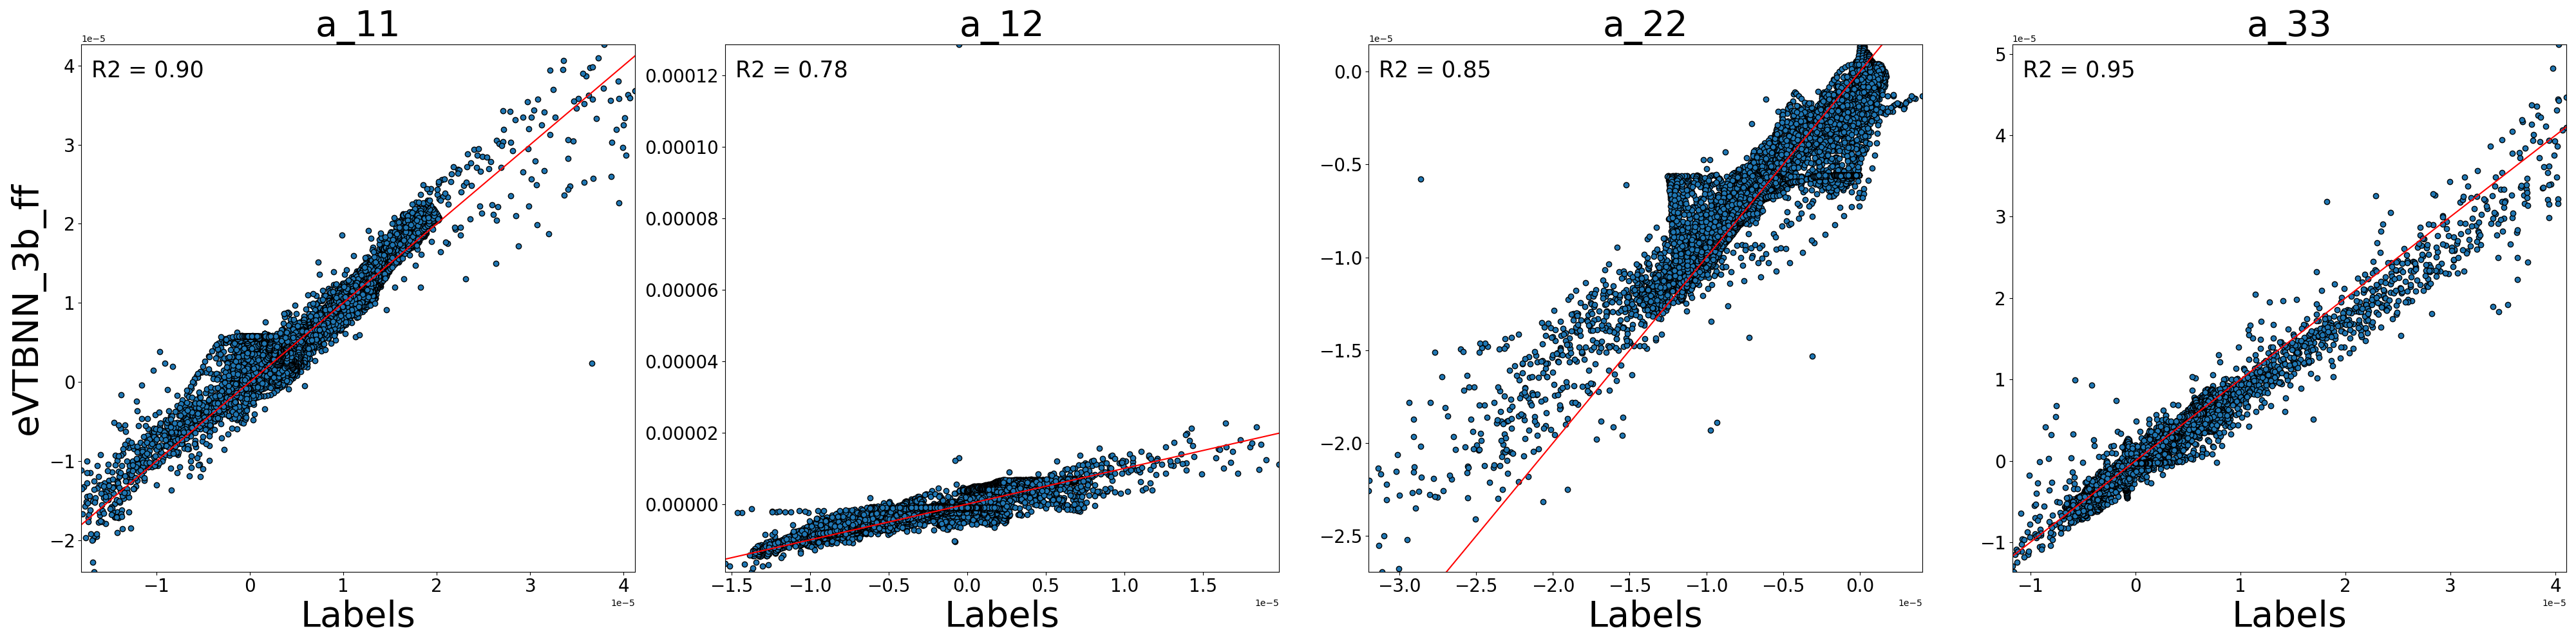

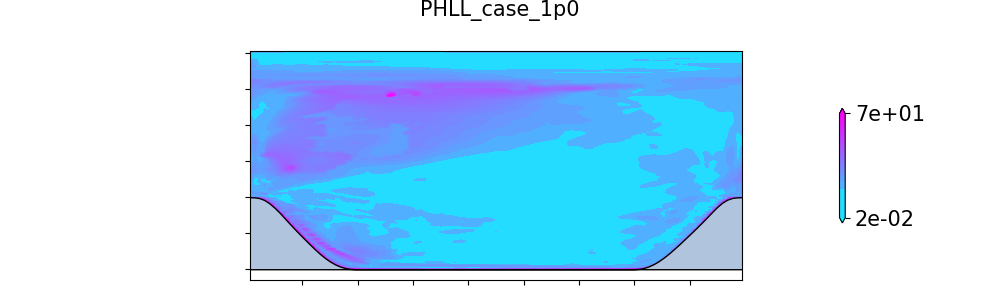

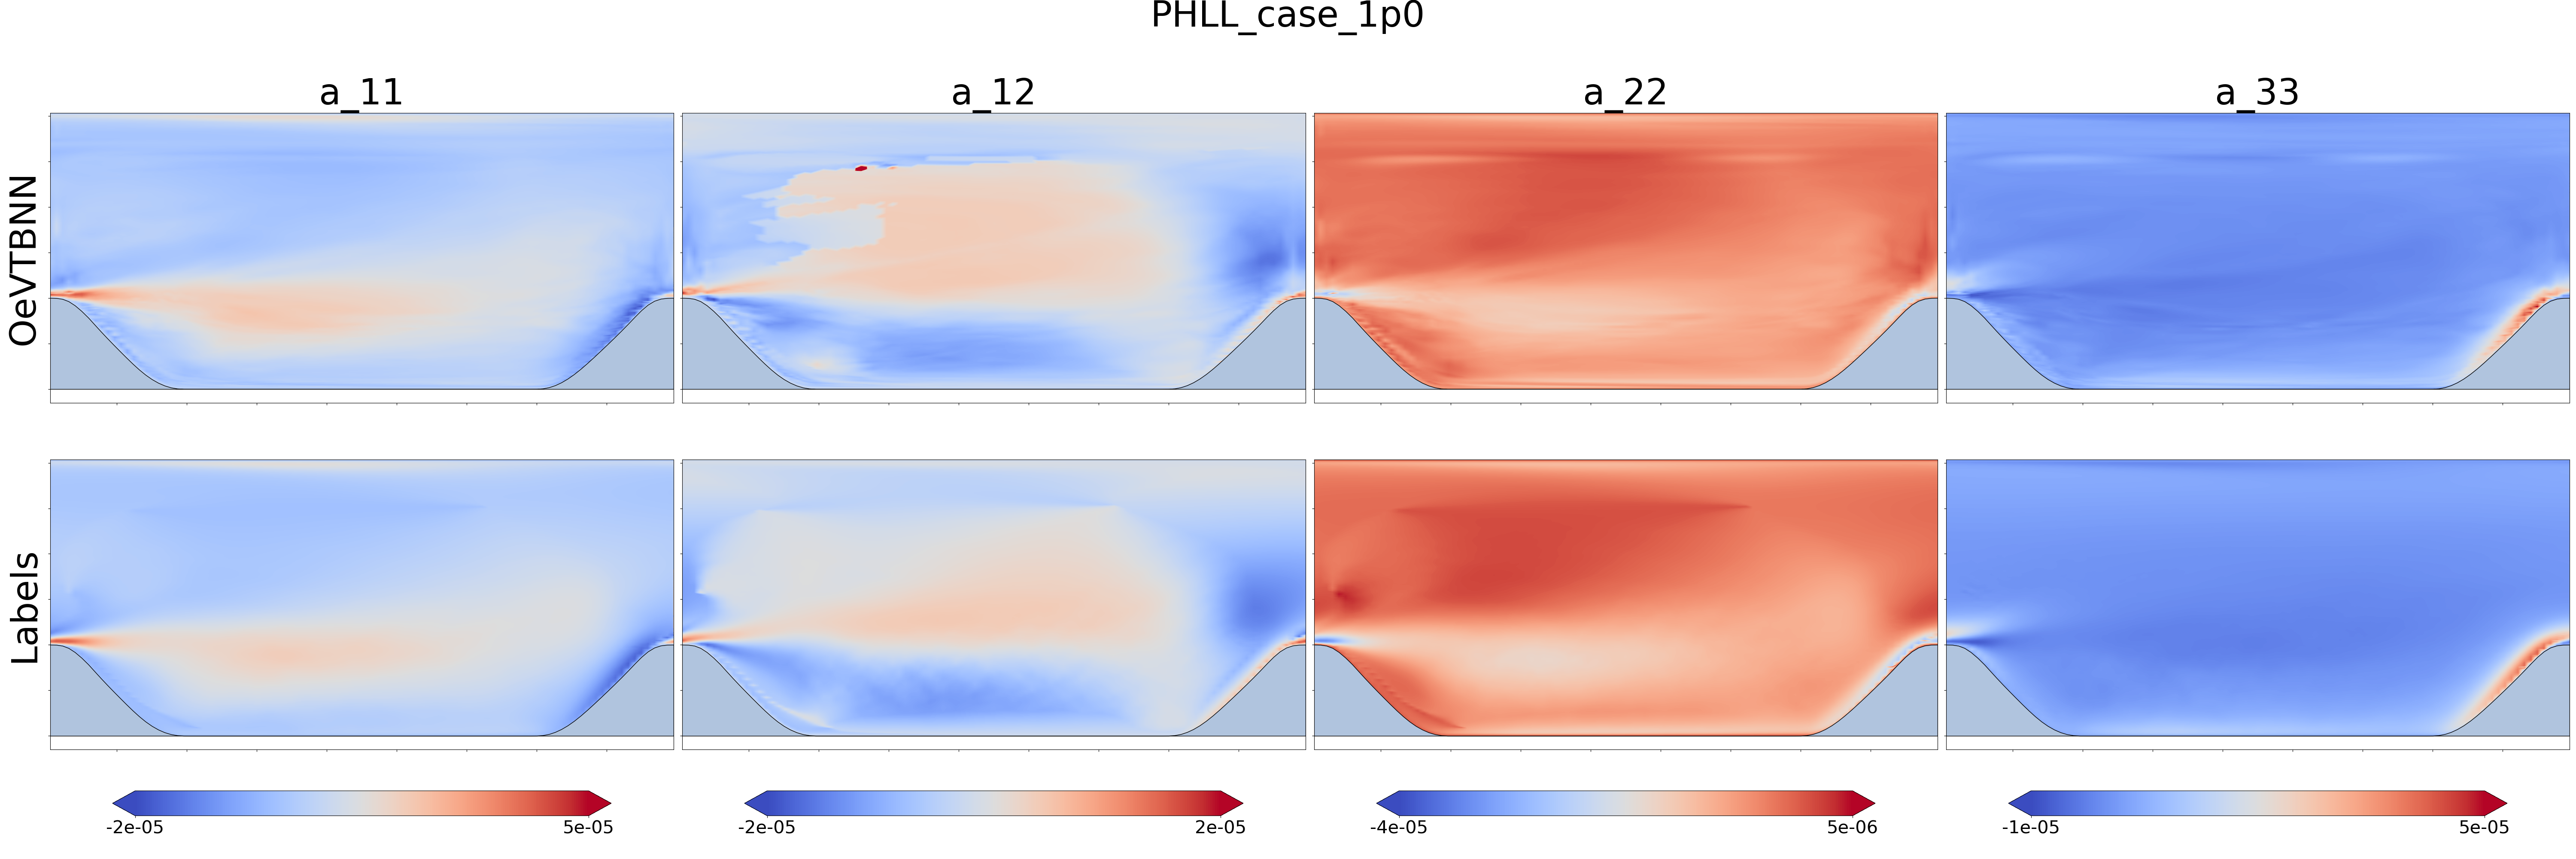

In [9]:
## Setting Batch Size and Epochs
batch_size =  128
epochs = 500

# Setting Learning rate
lr = 5e-4

# Setting Depth and Width of NNs
layers_eVNN = 2
units_eVNN = 150
n_dense_eVNN = 3

layers_TBNN = 3
units_TBNN = 150
n_dense_TBNN = 5


scaler = []
labels_scaler_NL = []
labels_scaler = []
labels_scaler_eV = []

pred_dict = {}

eV_pred_dict = {}

metrics_file = ''


print('> Not using Cross Validation')
val_cases = [train_val_cases[2]]
train_cases = [case for case in train_val_cases if case not in val_cases]

    ### ujust tp build scaçers
_train, scaler, labels_scaler_NL, labels_scaler, labels_scaler_eV = data_clean_case(case_dict, train_cases, feat_list, remove_outliers_id, True, scaler, labels_scaler_NL, labels_scaler, labels_scaler_eV)        

mixer_dict = build_mixer_cases_scaled(case_dict, coords, cases, train_val_cases)

case_dict = place_mixer_on_case_dict(case_dict, mixer_dict, cases)

_train, scaler, labels_scaler_NL, labels_scaler, labels_scaler_eV = data_clean_case(case_dict, train_cases, feat_list, remove_outliers_id, True, scaler, labels_scaler_NL, labels_scaler, labels_scaler_eV)
    
joblib.dump(scaler, f'scalers\\scaler_{current_file}.save') 
joblib.dump(labels_scaler, f'scalers\\labels_scaler_{current_file}.save') 
joblib.dump(labels_scaler_NL, f'scalers\\labels_scaler_NL_{current_file}.save') 
joblib.dump(labels_scaler_eV, f'scalers\\labels_scaler_eV_{current_file}.save') 

_val, scaler, labels_scaler_NL, labels_scaler, labels_scaler_eV = data_clean_case(case_dict, val_cases, feat_list, remove_outliers_id, True, scaler, labels_scaler_NL, labels_scaler, labels_scaler_eV)
print(f'\n - Train: {train_cases}  {len(_train[0])}data points\n - Val: {val_cases}  {len(_val[0])} data points\n')

model = build_Framework(lr, layers_eVNN, units_eVNN, n_dense_eVNN, layers_TBNN, units_TBNN, n_dense_TBNN, cwd, current_file)

       
model = train_model(_train, _val, model, construct_TBNN, epochs, batch_size, current_file, cwd)
        
metrics_file += pedict_parity(pred_dict, case_dict, model, val_cases, feat_list, remove_outliers_inference, False, scaler, labels_scaler_NL,labels_scaler, labels_scaler_eV, metrics_file, current_file, 'Validation set')
    

In [10]:

def pedict_parity(pred_dict, case_dict, model, cases, feat_list, remove_outliers_id, shuffling, scaler, labels_scaler_NL, labels_scaler, labels_scaler_eV, metrics_file, current_file, id):
        
    for case in cases:
        _labels = data_clean_case(case_dict, [case], feat_list, remove_outliers_id, shuffling, scaler, labels_scaler_NL, labels_scaler,labels_scaler_eV)[0] 
        pred_dict[case] = labels_scaler.inverse_transform(model([_labels[0], _labels[1], _labels[2]]))


            #NL_pred_dict[case] = labels_scaler_NL.inverse_transform(model([_labels[0], _labels[1], _labels[2], _labels[5]])[0]) 
            
        metrics_file += f'\n\n====== {case} - {id}  ======'

            #force realizability
        print('\n==================== Ensuring Realizability ====================')
        pred_dict[case] = force_realizability(pred_dict[case])
            #NL_pred_dict[case] = force_realizability(NL_pred_dict[case])
           # _labels[] = force_realizability(labels_scaler.inverse_transform(_labels[4]))

        metrics_file += get_parity_plots(pred_dict[case],case_dict[case][4],  case, current_file, metrics_file) 
            
        relative_error_percent = {case: np.array([np.linalg.norm(pred_dict[case][i]-_labels[3][i]) / np.linalg.norm(_labels[3][i]) for i in range(_labels[3].shape[0]) ])                       
                          for case in [case]}
            
        get_plots_error(relative_error_percent[case], _labels[-2], _labels[-1], case, current_file, f'{case}')

        get_plots(pred_dict[case], case_dict[case][4], _labels[-2], _labels[-1], case, current_file, case)

        print(f'\n====== {case} Overall Metrics ======')
        print(f'> mean absolute error = {mean_absolute_error(case_dict[case][4], pred_dict[case])}')
        print(f'> mean squared error = {mean_squared_error(case_dict[case][4], pred_dict[case])}')
        print(f'> r2 score = {r2_score(case_dict[case][4], pred_dict[case]):.3f}')
        print('\n\n\n')

        metrics_file += f'\n====== {id} Overall Metrics ======\n> MAE = {mean_absolute_error(_labels[3], pred_dict[case])}\n> MSE = {mean_squared_error(_labels[3], pred_dict[case])}\n> R2 = {r2_score(_labels[3], pred_dict[case])}'
    
    return metrics_file




==================== Transforming Data ====================
>I1_1 data strictly positive or negative: applying log transformation
>I1_2 not transformed as it is not skewed enough
>I1_3 data strictly positive or negative: applying log transformation
>I1_4 data strictly positive or negative: applying log transformation
>I1_5 not transformed as it is not skewed enough
>I1_6 data strictly positive or negative: applying log transformation
>I1_8 not transformed as it is not skewed enough
>I1_9 data strictly positive or negative: applying log transformation
>I1_15 not transformed as it is not skewed enough
>I1_17 not transformed as it is not skewed enough
>I1_19 not transformed as it is not skewed enough
>I2_3 data strictly positive or negative: applying log transformation
>I2_4 data strictly positive or negative: applying log transformation
> Transformed data
 - x: (14751, 15, 3)
 - basis: (14751, 20, 3, 3)
 - Shat: (14751, 3)
 - y: (14751, 4)

(14751, 15, 3)
==================== Scaling 


==================== Ensuring Realizability ====================
iteration 1
> 6298 out of 14751 points already satisfy realizability

iteration 2
> 9522 out of 14751 points already satisfy realizability

iteration 3
> 11200 out of 14751 points already satisfy realizability

iteration 4
> 12077 out of 14751 points already satisfy realizability

iteration 5
> 12516 out of 14751 points already satisfy realizability

iteration 6
> 12717 out of 14751 points already satisfy realizability

iteration 7
> 12824 out of 14751 points already satisfy realizability

iteration 8
> 12865 out of 14751 points already satisfy realizability

iteration 9
> 12887 out of 14751 points already satisfy realizability

iteration 10
> 12903 out of 14751 points already satisfy realizability

iteration 11
> 12924 out of 14751 points already satisfy realizability

iteration 12
> 12964 out of 14751 points already satisfy realizability

iteration 13
> 13016 out of 14751 points already satisfy realizability

iteration

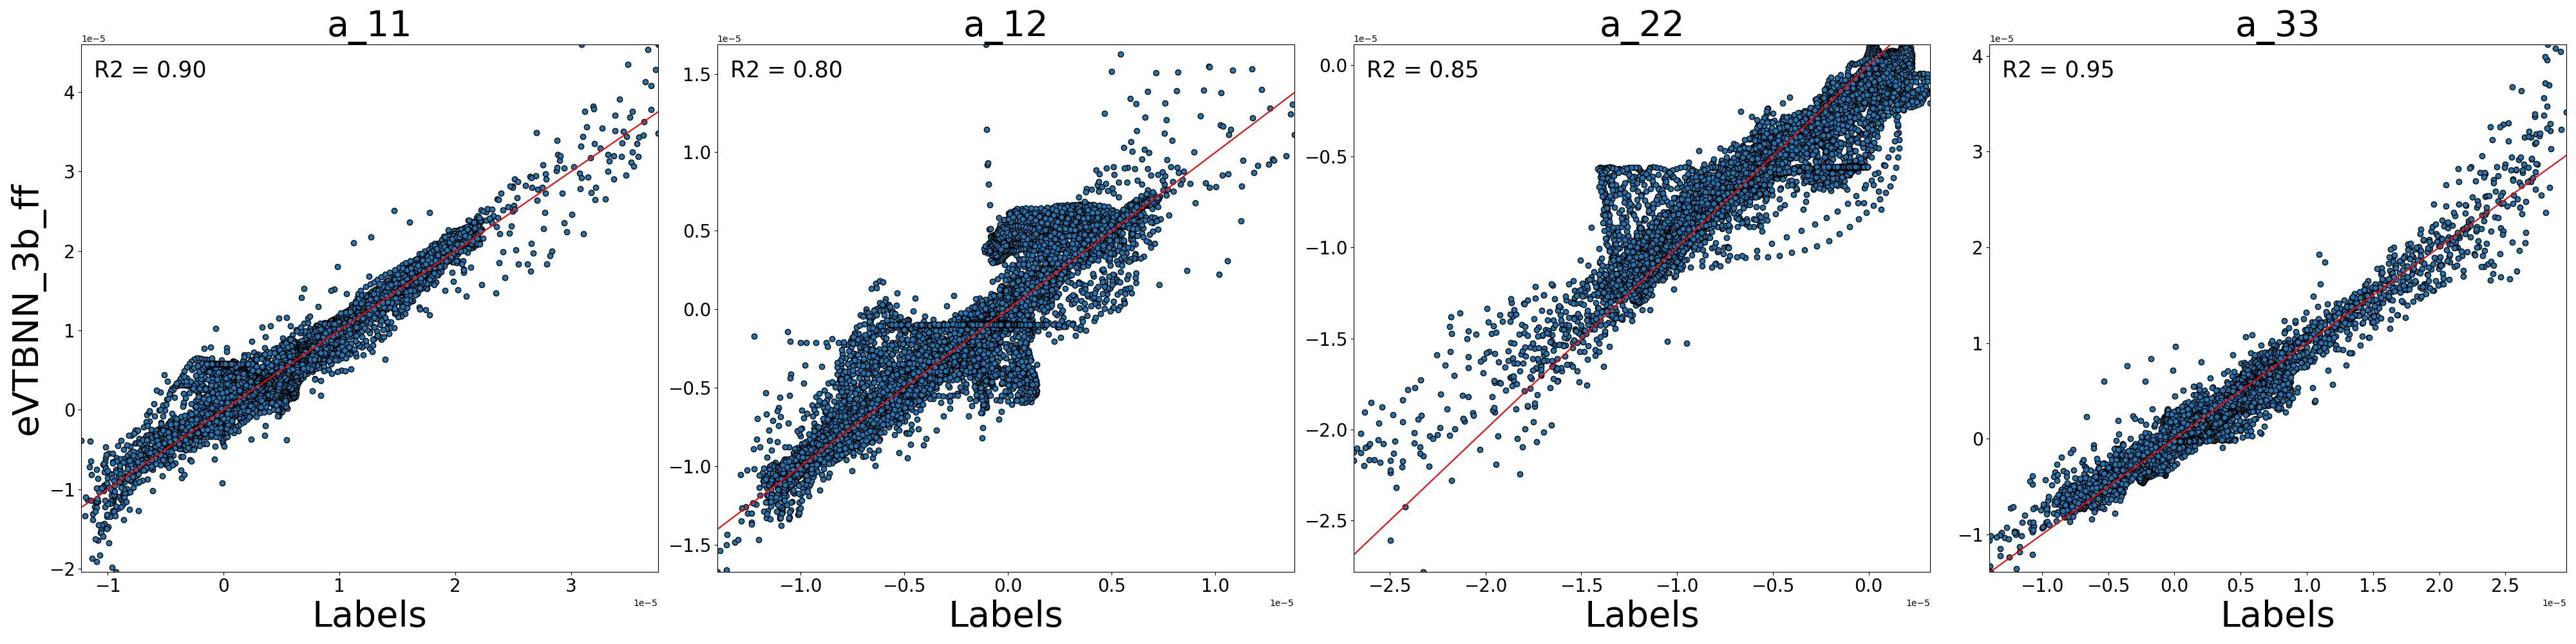

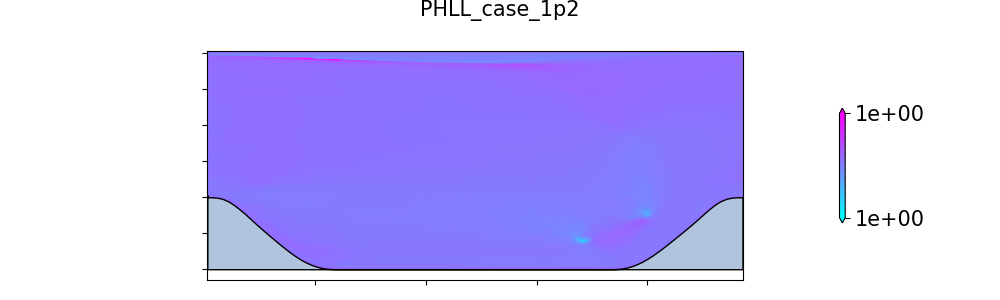

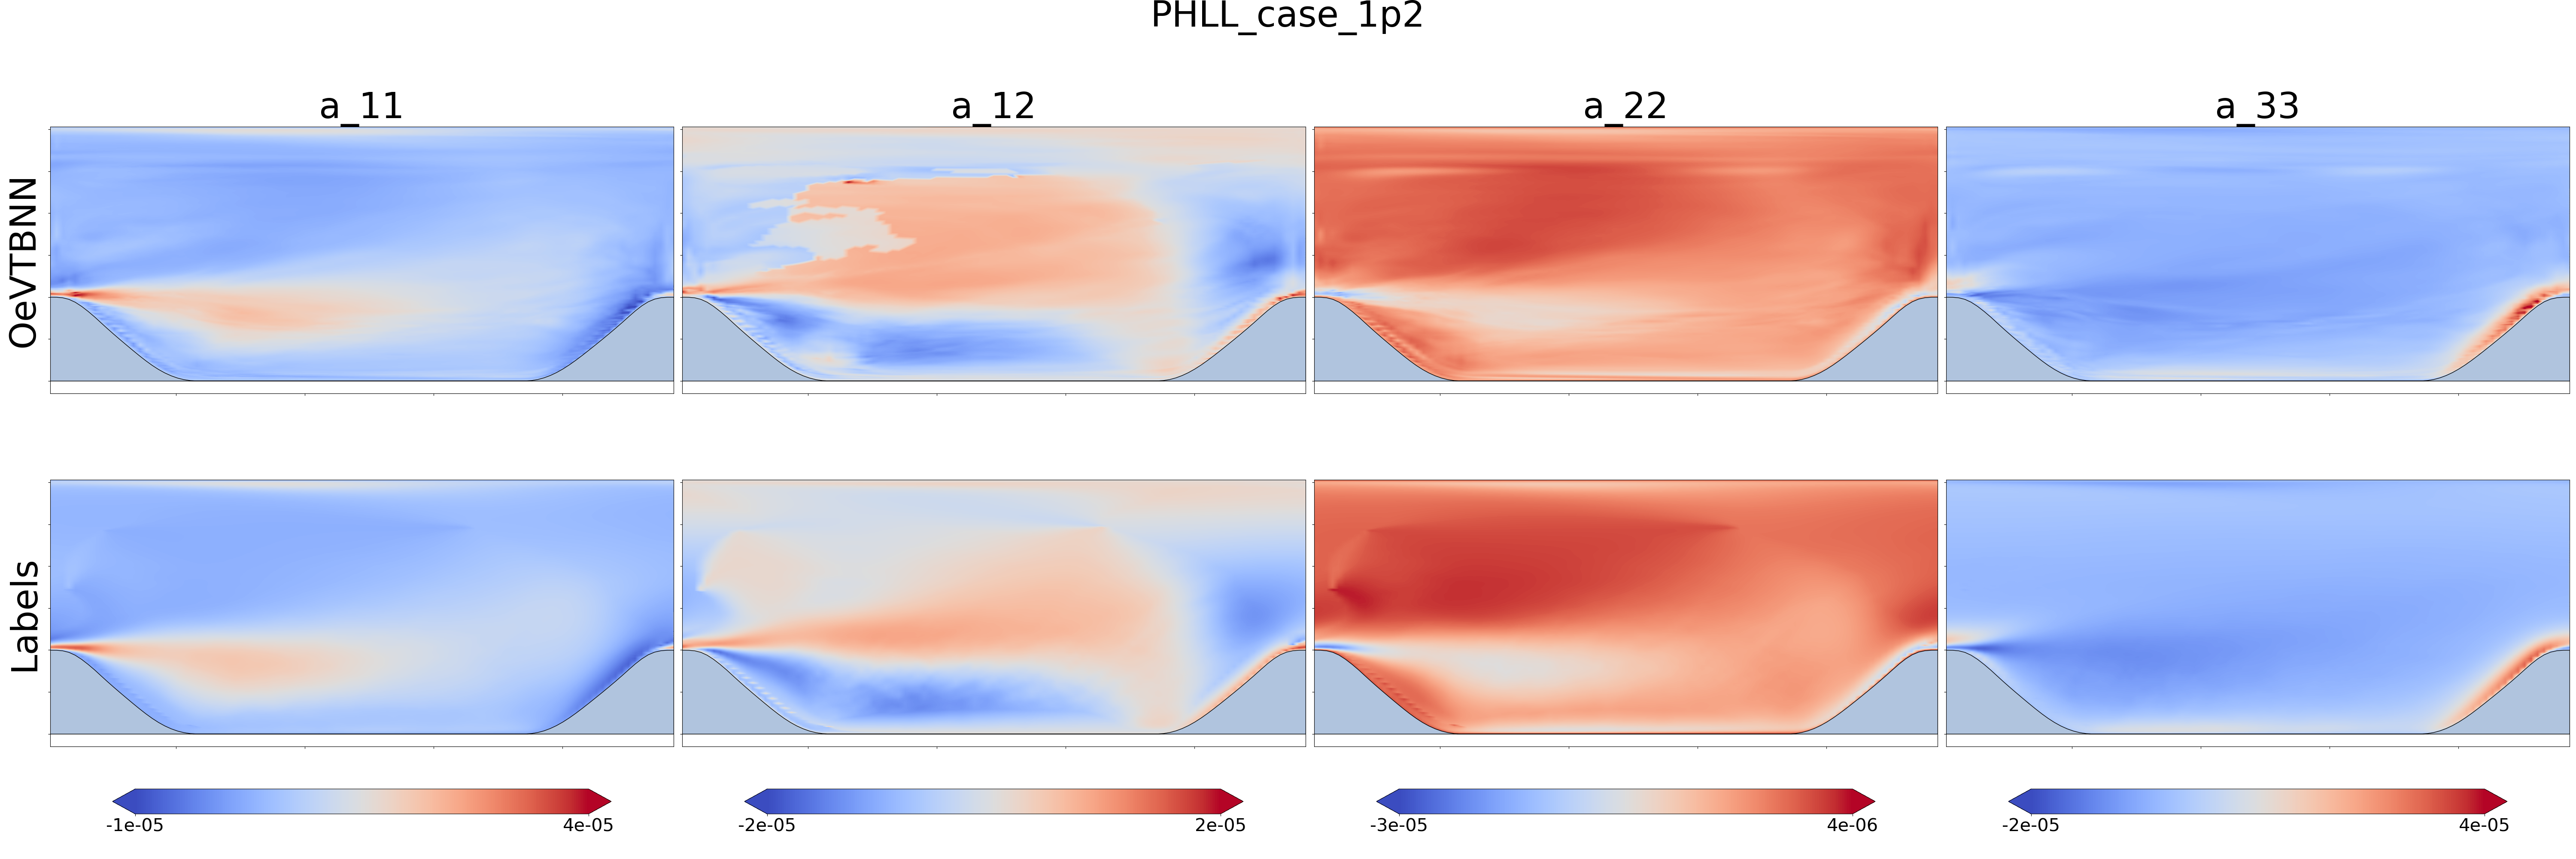

In [11]:
#### test mode
metrics_file += pedict_parity(pred_dict, case_dict, model,test_cases, feat_list, remove_outliers_inference, False, scaler, labels_scaler_NL, labels_scaler, labels_scaler_eV, metrics_file, current_file, 'Test set')

In [13]:
with open(f'folds_dict//a_NL_f1.pkl', 'wb') as fp:
    pickle.dump(pred_dict, fp)
    print('dictionary saved successfully to file')

full_pred_dict = {case:{
                        'a_NL': pred_dict[case]
                       } for case in test_cases}

dictionary saved successfully to file


In [ ]:
class ODE_operator(object):
    def __init__(self, x, y, a,nX=99, nY=149):
        self.X = x
        self.Y = y
        self.nY = nY
        self.nX = nX
        self.a = a
        
        self.interior_points = self.assemble_index()
        
        self.dX, self.dY = self.build_distance_matrix_interior_points()
        
        self.build_boundary_distances()
        
      
    def inlet(self):
        return np.array([(i+1)*self.nX-1 for i in range(self.nY)])          
        
    def outlet(self):
        return np.array([i*self.nX for i in range(self.nY)])
       
    def top(self):
        return np.array([i for i in range(self.nX)])    
        
    def wall(self):
        return np.array([len(self.X)-i for i in range(1,self.nX+1)])  
    
    def assemble_index(self): 
        BCs = np.unique(np.concatenate((self.top(), self.wall(), self.outlet(), self.inlet()), axis = None))
        interior_points = np.array([i for i in range(len(self.X)) if i not in BCs])
        return interior_points
    
    def build_distance_matrix_interior_points(self):
        dX = np.array([0.0 for i in range(len(self.X))])
        dY = np.array([0.0 for i in range(len(self.Y))])
        for j in range(self.nY):
            for i in range(self.nX):
                if 0<i<self.nX-1:
                    dX[j*self.nX+i] = self.X[j*self.nX+i-1] - self.X[j*self.nX+i+1]
                if 0<j<self.nY-1: 
                    dY[j*self.nX+i] = self.Y[(j-1)*self.nX+i] - self.Y[(j+1)*self.nX+i]
        return dX, dY
    
    def build_boundary_distances(self):
        ### 0 nX - 1
        ### -1 -nX
        for j in range(self.nY):
            ### outlet
            self.dX[j*self.nX] = self.X[j*self.nX]-self.X[j*self.nX+1]
            ### inlet
            self.dX[(j+1)*self.nX-1] = -self.X[(j+1)*self.nX-1]+self.X[(j+1)*self.nX-2] 
        
        for i in range(self.nX+1):
            ### top
            self.dY[i] =  self.Y[i] - self.Y[i+self.nX]
            ### bottom
            if i > 0:
                self.dY[-i] = -self.Y[-i] + self.Y[-i-self.nX]
                
    def check_continuity(self):
        continuity_solution = np.array([0.0 for i in range(len(self.X))])
        print('> Checking continuity of the provided field')
        ### loop over interior points
        for j in range(self.nY):
            for i in range(self.nX):
                if 0<i<self.nX-1:
                    continuity_solution[j*self.nX+i] += (self.a[j*self.nX+i-1][0] - self.a[j*self.nX+i+1][0])/self.dX[j*self.nX+i] ### d(a_11)/d(x)
                    continuity_solution[j*self.nX+i] += (self.a[j*self.nX+i-1][1] - self.a[j*self.nX+i+1][1])/self.dX[j*self.nX+i] ### d(a_12)/d(x)
                    
                if 0<j<self.nY-1: 
                    continuity_solution[j*self.nX+i] += (self.a[(j-1)*self.nX+i][1] - self.a[(j+1)*self.nX+i][1])/self.dY[j*self.nX+i] ### d(a_12)/d(y)
                    continuity_solution[j*self.nX+i] += (self.a[(j-1)*self.nX+i][2] - self.a[(j+1)*self.nX+i][2])/self.dY[j*self.nX+i] ### d(a_22)/d(y)
                    
        ### loop over BCs
        for j in range(self.nY):
            ### outlet
            continuity_solution[j*self.nX] += (self.a[j*self.nX][0] - self.a[j*self.nX+1][0])/self.dX[j*self.nX] ### d(a_11)/d(x)
            continuity_solution[j*self.nX] += (self.a[j*self.nX][1] - self.a[j*self.nX+1][1])/self.dX[j*self.nX] ### d(a_12)/d(x)
            
            ### inlet
            continuity_solution[(j+1)*self.nX-1] += (self.a[(j+1)*self.nX-1][0] - self.a[(j+1)*self.nX-2][0])/self.dY[j*self.nX+i] ### d(a_11)/d(x)
            continuity_solution[(j+1)*self.nX-1] += (self.a[(j+1)*self.nX-1][1] - self.a[(j+1)*self.nX-2][1])/self.dY[j*self.nX+i] ### d(a_12)/d(x)
        
        for i in range(self.nX+1):
            ### top
            continuity_solution[i] += (self.a[i+self.nX][1] - self.a[i+self.nX][1])/self.dY[i] ### d(a_12)/d(y)
            continuity_solution[i] += (self.a[i+self.nX][2] - self.a[i+self.nX][2])/self.dY[i] ### d(a_22)/d(y)
            
            ### bottom
            if i > 0:
                continuity_solution[-i] += (self.a[-i][1] - self.a[-i-self.nX][1])/self.dY[-i] ### d(a_12)/d(y)
                continuity_solution[-i] += (self.a[-i][2] - self.a[-i-self.nX][2])/self.dY[-i] ### d(a_22)/d(y)
            
            
#                 if j*self.nX+i in self.interior_points:
#                     ### d(a_11)/d(x)
#                     ### d(a_12)/d(x)
#                     ### d(a_12)/d(y)
#                     ### d(a_22)/d(y)
#                     continuity_solution[j*self.nX+i] = (self.a[j*self.nX+i-1][0] - self.a[j*self.nX+i+1][0])/self.dX[j*self.nX+i] + \
#                                                        (self.a[j*self.nX+i-1][1] - self.a[j*self.nX+i+1][1])/self.dX[j*self.nX+i] + \
#                                                        (self.a[(j-1)*self.nX+i][1] - self.a[(j+1)*self.nX+i+1][1])/self.dY[j*self.nX+i] + \
#                                                        (self.a[(j-1)*self.nX+i][2] - self.a[(j+1)*self.nX+i+1][2])/self.dY[j*self.nX+i]
                
#                 if j*self.nX+i == 0:
                    
#                 if j*self.nX+i == self.nX:
                    
#                 if j*self.nX+i == len(self.X) - self.nX - 1:
                    
#                 if j*self.nX+i == len(self.X) -1:
                    
        return continuity_solution
        
    def calculate_distances(self):
        
        return np.concatenate((self.X[self.top()], self.X[self.wall()], self.X[self.outlet()], self.X[self.inlet()]), axis=None), np.concatenate((self.Y[self.top()], self.Y[self.wall()], self.Y[self.outlet()], self.Y[self.inlet()]), axis=None) 

In [ ]:
def div_plot(ev,DNS, cX, cY, case, label=['OeVTBNN', 'DNS']):
    fig = plt.figure(figsize=(7.5, 9))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle(case, fontsize=20, y=1.)
    #plt.subplots_adjust(hspace=3)
         
    x, y = extract_wall_surf(cX, cY, case)    
        
    # create a common colorbar for each pair of subplots
    cmap = matplotlib.colormaps['seismic']
        #'coolwarm']
    
    vmax =  0.0035#float(1*max(ev))
    vmin =  -0.002#float(1*min(ev))
    
    norm = Normalize(vmin=vmin, vmax=vmax)#matplotlib.colors.LogNorm(vmin=vmin, vmax=vmax)
    levels = create_levels(vmin, vmax)


    
    for i, _plt in zip([1,2],[ev,DNS]):
        print(i)
        ax = plt.subplot(2, 1, i)

        # filter df and plot ticker on the new subplot axis

        if i == 1:
            ax.set_title('div(a)', fontsize=20)
        
        ax.set_ylabel(label[i-1], fontsize=20, rotation=90, labelpad=8)
    
      
        cont = ax.tricontourf(cX, cY, _plt, norm = norm, cmap = cmap, levels = levels,  extend = 'both')
        ax.fill_between(x, y, facecolor = 'lightsteelblue', edgecolor = 'black', interpolate = True)

        ax.xaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticklabels([])

        ax.set_aspect(1.3)

 # Add a colorbar to the plot

    cbar = plt.colorbar(cont, ax=ax, format='%0.5f', orientation='horizontal', shrink=.8, pad=0.1, ticks = [vmin, vmax])
    cbar.ax.tick_params(labelsize=10)
    
    print(ev.max())
    print(ev.min())
    print(ev.mean())
            
    fig.tight_layout()   
    
    plt.savefig(f'imgs\\{current_file}_divergence_{case}')
    

In [ ]:
case = 'PHLL_case_1p2'
div = ODE_operator(case_dict[case][-2], case_dict[case][-1], case_dict[case][3]).check_continuity()
div_pred = ODE_operator(case_dict[case][-2], case_dict[case][-1], pred_dict[case]).check_continuity()

> Checking continuity of the provided field
> Checking continuity of the provided field


1
2
0.0020353788740920657
-0.0019053665296734912
-7.264247873273234e-06


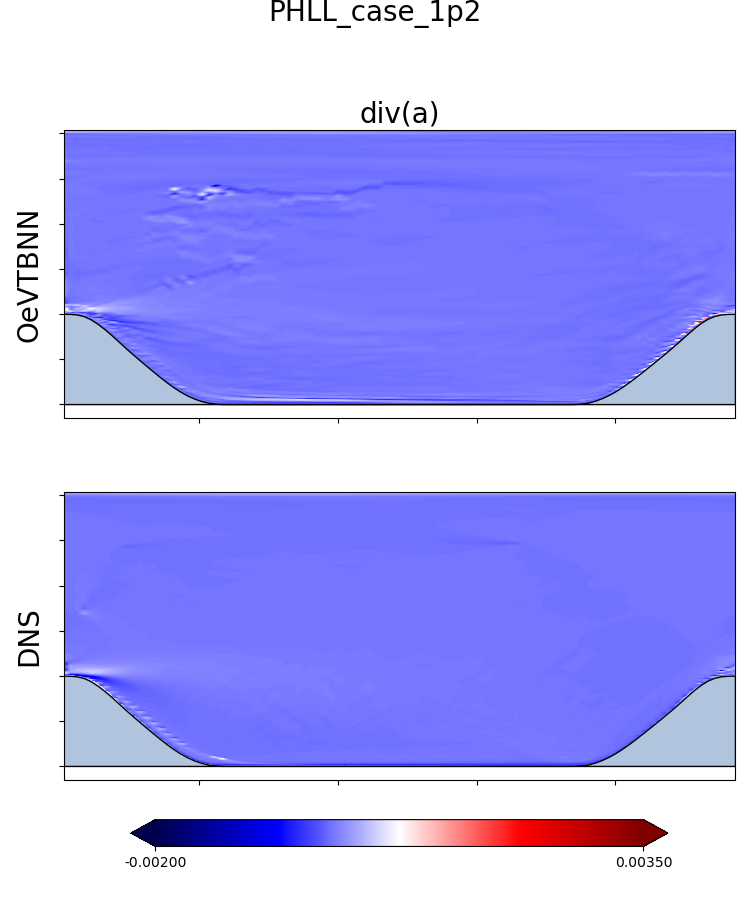

In [ ]:
div_plot(div_pred, div, case_dict[case][-2], case_dict[case][-1], case)

> sucessfuly plotted PHLL_case_1p2



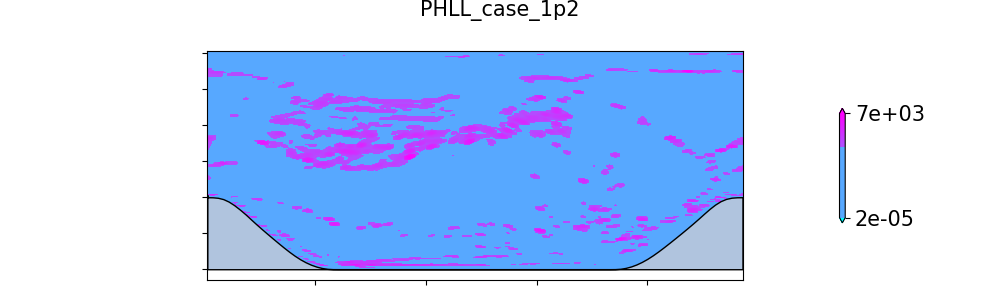

In [ ]:
div_rel_error = np.abs((div-div_pred/div))

get_plots_error(div_rel_error,  case_dict[case][-2], case_dict[case][-1], case, current_file, f'{case}')